In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json

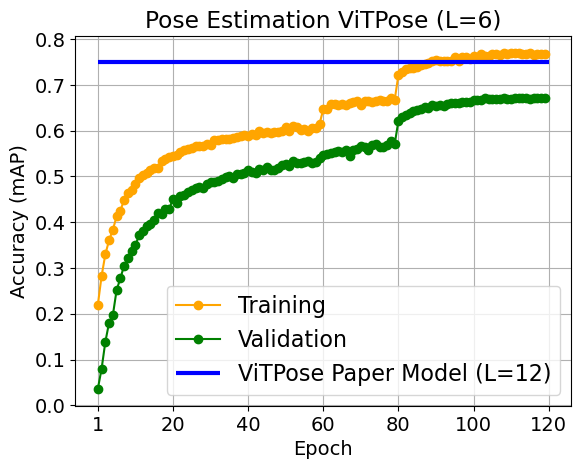

In [ ]:
#####################################################################
######################## OUR CODE ###################################
#####################################################################

history = []
train_losses = []
train_acc = []
maps = []
epoch_intervals = ["20", "40", "60", "80", "100", "120"]
# read files and import quantities
for epoch in epoch_intervals:
    history = [] # reset history
    for line in open("epoch_" + epoch +".json", 'r'):
        record = json.loads(line)
        history.append(json.loads(line)) if len(record) > 1 else None
    
    for i in range(0,len(history)):
        if (history[i]['mode'] == 'val'):
            train_losses.append(history[i-1]['loss'])
            train_acc.append(history[i-1]['acc_pose'])
            maps.append(history[i]['AP'])
        

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
    
# # plot loss
# plt.grid(True)
# plt.plot(np.arange(len(train_losses)),train_losses, color='blue', marker='o')
# plt.xlabel('Epoch')
# plt.ylabel('Training Loss')

# plot accuracies
fig = plt.figure()
plt.grid(True)
plt.plot(np.arange(len(train_acc)),train_acc, color='orange', marker='o')
plt.plot(np.arange(len(maps)),maps, color='green', marker='o')
plt.hlines(0.75, 0, 120, color='blue', linewidth=3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (mAP)')
plt.legend(["Training", "Validation","ViTPose Paper Model (L=12)"], loc ="lower right",fontsize=16)
plt.title("Pose Estimation ViTPose (L=6)")
x_ticks = [0, 20, 40, 60, 80, 100, 120]
x_labels = ['1', '20', '40', '60', '80', '100', '120'] 
plt.xticks(ticks=x_ticks, labels=x_labels)

# # plot map
# fig = plt.figure()
# plt.grid(True)
# plt.plot(np.arange(len(maps)),maps, color='green', marker='o')
# plt.xlabel('Epoch')
# plt.ylabel('Validation mAP')

plt.savefig("vitpose_accuracy_plot.pdf")
plt.show()

#####################################################################
#####################ee END OF OUR CODE #############################
#####################################################################